In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

*We now concat train and test datasets to process the missing values *

In [3]:
df = pd.concat((train.loc[:,'Id':'SaleCondition'], test.loc[:,'Id':'SaleCondition']), ignore_index= True)

In [4]:
num_col = df.columns[df.dtypes != np.object]
cat_col = df.columns[df.dtypes == np.object]
(cat_col[df[cat_col].isnull().sum() > 0])

Index([u'MSZoning', u'Alley', u'Utilities', u'Exterior1st', u'Exterior2nd',
       u'MasVnrType', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PoolQC', u'Fence', u'MiscFeature',
       u'SaleType'],
      dtype='object')

In [24]:
df[cat_col].isnull().sum()[df[cat_col].isnull().sum() > 0]

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [117]:
df.BsmtFinSF1.median()

368.5

In [ ]:
sns.distplot(df.GarageYrBlt)

In [ ]:
df[num_col].isnull().sum()[df[num_col].isnull().sum() > 0]

In [ ]:
df['MSZoning'].fillna('RL',inplace = True) # "RL" is highest occuring value in this category
df['Utilities'].fillna('AllPub',inplace = True) # "AllPub" is the mode of this category
df['MiscFeature'].fillna('None', inplace = True) # Na is "None" as given in data description
df['MasVnrType'].fillna('None', inplace = True) # it`s the mode of the category
df['Functional'].fillna('Typ', inplace = True) # it`s the mode of the category
df['Exterior1st'].fillna('VinylSd', inplace = True) # It`s the mode
df['Exterior2nd'].fillna('VinylSd', inplace = True) # IT`s the mode
df['Electrical'].fillna('SBrkr', inplace = True) # IT`s the mode
df['KitchenQual'].fillna('TA', inplace = True) # IT`s the mode
df['SaleType'].fillna('WD', inplace = True) # IT`s the mode

In [ ]:
# Categorical Features Alley, MasVnrType, Basement features, fireplace, garage features, pool and fence have "Null" as a feature
# Thus we can fill them with "No" + "Particular feature"

df['Alley'].fillna('No Alley',inplace = 1)
df['FireplaceQu'].fillna("No Fireplace", inplace = 1)
df['PoolQC'].fillna('No Pool',inplace = 1)
df['Fence'].fillna('No Fence',inplace = 1)
df['GarageType'].fillna('No Garage',inplace = True)
df['GarageCond'].fillna('No Garage',inplace = True)
df['GarageFinish'].fillna('No Garage',inplace = True)
df['GarageQual'].fillna('No Garage',inplace = True)
df['BsmtCond'].fillna('No Basement',inplace = True)
df['BsmtQual'].fillna('No Basement',inplace = True)
df['BsmtExposure'].fillna('No Basement',inplace = True)
df['BsmtFinType1'].fillna('No Basement',inplace = True)
df['BsmtFinType2'].fillna('No Basement',inplace = True)

In [5]:
df[num_col].isnull().sum()[df[num_col].isnull().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [ ]:
x = df.loc[df["LotFrontage"].notnull(), "LotArea"]
y = df.loc[df["LotFrontage"].notnull(), "LotFrontage"]
#plt.scatter(x, y)
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t],3)

df.loc[df["LotFrontage"].isnull(),"LotFrontage"] = np.polyval(p,df.loc[df["LotFrontage"].isnull(), "LotArea"])

In [ ]:
df.loc[df['MasVnrType'].isnull(),'MasVnrArea'] = 0

In [ ]:
df.loc[df['BsmtFinType1'] == "No Basement",'BsmtFinSF1'] = 0
df.loc[df['BsmtFinType2'] == "No Basement",'BsmtFinSF2'] = 0
df.loc[df['BsmtQual'] == "No Basement",'BsmtUnfSF'] = 0
df.loc[df['BsmtQual'] == "No Basement",'BsmtUnfSF'] = 0

In [132]:
pd.set_option('display.max_rows', 1500)
bsmt = df.filter(regex = 'Bsmt')
bsmt[bsmt.isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Root mean square:  14.5191312483


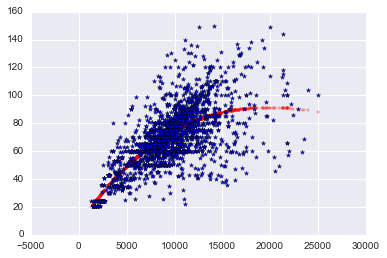

In [113]:
x = df.loc[df["LotFrontage"].notnull(), "LotArea"]
y = df.loc[df["LotFrontage"].notnull(), "LotFrontage"]
#plt.scatter(x, y)
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t],3)
#print p

plt.scatter(x[t],np.polyval(p, x[t]),c = 'r',marker= '+')
plt.scatter(x[t],y[t],c='b',marker = '*')

from sklearn.metrics import mean_squared_error
from math import sqrt

print "Root mean square: ",sqrt(mean_squared_error(y[t],np.polyval(p, x[t]) ))

In [ ]:
df.loc[df['LotFrontage'].isnull(),['LotFrontage','LotArea','LotConfig','LotShape']]

In [31]:
df.loc[df['MasVnrType'].isnull(),['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [28]:
grg = df.filter(regex = 'Garage')
grg[grg['GarageYrBlt'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
99,NaN,NaN,NaN,0.0,0.0,NaN,NaN
108,NaN,NaN,NaN,0.0,0.0,NaN,NaN
125,NaN,NaN,NaN,0.0,0.0,NaN,NaN
127,NaN,NaN,NaN,0.0,0.0,NaN,NaN
140,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [16]:
df.loc[df['BsmtFinType2'].isnull(),'BsmtFinSF2'].describe()

count     79.000000
mean       6.063291
std       53.891710
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max      479.000000
Name: BsmtFinSF2, dtype: float64

In [20]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [133]:
df.isnull().sum()[df.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

From Inspiration of (https://www.kaggle.com/tannercarbonati/house-prices-advanced-regression-techniques/detailed-data-analysis-ensemble-modeling/notebook) I am converting the Na's into with logical values (like mean or mode) 
 

In [134]:
df.loc[df['MSZoning'].isnull(),['MSZoning','MSSubClass']]

,MSZoning,MSSubClass
1915,NaN,30
2216,NaN,20
2250,NaN,70
2904,NaN,20


In [135]:
pd.crosstab(df['MSZoning'],df['MSSubClass'])

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190
MSZoning,,,,,,,,,,,,,,,,
C (all),3,8,0,0,7,0,4,0,0,0,0,0,0,0,0,3
FV,34,0,0,0,0,43,0,0,0,0,0,19,0,43,0,0
RH,4,2,0,1,2,0,3,0,0,0,4,6,0,0,0,4
RL,1016,61,4,6,159,529,57,9,115,47,92,117,1,21,0,31
RM,20,67,2,11,119,3,63,14,3,1,13,40,0,64,17,23


In [138]:
df.loc[(2216,2904),'MSZoning'] = 'RL'
df.loc[(1915,2250),'MSZoning'] = 'RM'

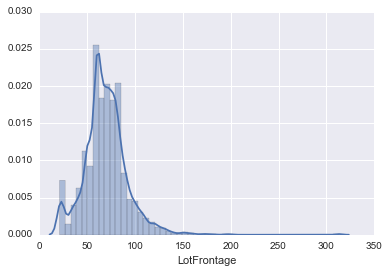

In [146]:
gm = df.loc[df['LotFrontage'].notnull(),['LotFrontage','LotArea']]
sns.distplot(gm['LotFrontage'])

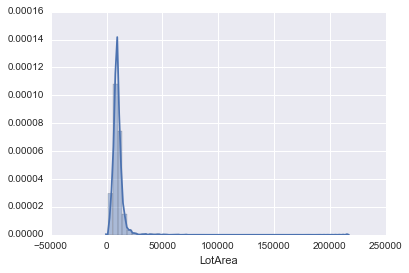

In [147]:
sns.distplot(gm['LotArea'])